# TAREA 1: Least Squares.

**Matematicas para el Aprendizaje de Máquina**

**Universidad Nacional de Colombia**

**2022**

**(1)** Relacionado con la naturaleza de los datos, qué condiciones deberían tener las matrices $A$ y $b$ para ser solubles desde la perspectiva de mínimos cuadrados.

# Solución: 

Debido a que el metodo de minimos cuadrados requiere resolver las ecuaciones normales $x = (A^T A)^{-1} A^T  b = A^+ b$, con $A^+ = (A^T A)^{-1} A^T$; es necesario que la matriz

$A^{T}A$ 

sea una matriz cuyas columnas resulten linealmente independientes, para garantizar la existencia unica del sistema lineal.

**(2)** Use mínimos cuadrados para modelos no lineales, ajuste el precio del Botcoin y realice una predicción usando el modelo para determinar su precio a futuro, con una semana de anticipación, y compare con los precios reales.

In [11]:
using CSV
using DataFrames

dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoinPrice2=reverse(dataBitcoin.Price);
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoinPrice2);

In [7]:
dataBitcoinPrice2

29-element Vector{String15}:
 "43833.9"
 "44038.2"
 "44388.9"
 "43521.0"
 "42388.4"
 "42205.2"
 "42061.1"
 "42550.3"
 "44544.4"
 "43883.6"
 "40552.8"
 "40000.1"
 "40090.3"
 ⋮
 "38339.2"
 "39209.6"
 "39115.5"
 "37689.1"
 "43188.2"
 "44420.3"
 "43912.8"
 "42463.0"
 "39142.7"
 "39395.8"
 "38403.1"
 "38014.8"

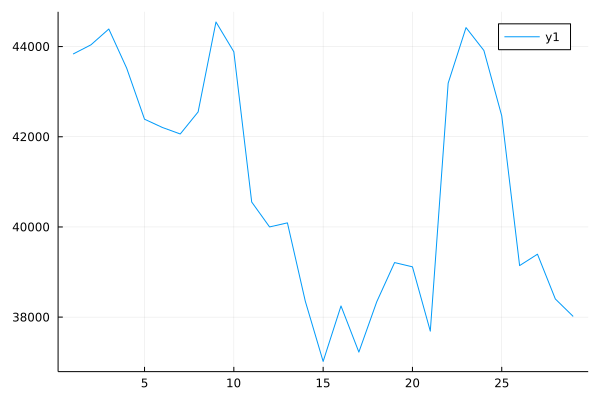

In [12]:
using Plots

plot(dataBitcoin.PriceFloat)

Proponemos un metodo no lineal de tipo polinomial como el siguiente:

$f(x_i,\beta)=a\cdot x_i^{b}$

Y ahora, usando minimos cuadrados, deseamos encontrar el argumento minimo:

$\tilde{\beta}=(\tilde{a},\tilde{b})=\mbox{arg min}_{\beta} r(\beta)$, donde $r(\beta)=\sum_{i}(y_i-f(x_i,\beta))^2$

Para ello, definiendo 
$J=\begin{bmatrix}
\partial r\over \partial a & \partial r\over \partial b\end{bmatrix}$
, como el Jacobiano del error $r$ recorriendo todos los datos. Usamos el algoritmo de Gauss-Newton que nos llevan a las siguiente iteracion:

$P^{k+1}=P^k-(J^{T}J)^{-1}J^{T}r$

Iniciamos con un $\beta_0$ inicial y deseamos iterar hasta que $ \| P^{k}-P^{k-1}  \| <\varepsilon$, para un $\varepsilon$ dado por el usuario. En este caso comenzamos con $\beta_0=()$ y $\varepsilon=0.2$.

In [13]:
X=Array((1.0:29.0))
Y=Array(dataBitcoin.PriceFloat)
print(X)
print(Y)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0][43833.9, 44038.2, 44388.9, 43521.0, 42388.4, 42205.2, 42061.1, 42550.3, 44544.4, 43883.6, 40552.8, 40000.1, 40090.3, 38355.0, 37017.7, 38248.2, 37224.6, 38339.2, 39209.6, 39115.5, 37689.1, 43188.2, 44420.3, 43912.8, 42463.0, 39142.7, 39395.8, 38403.1, 38014.8]

In [ ]:
using LinearAlgebra
P_0=[1.0,5.0]
i=0
while true
    j_1=X.^P_0[2]
    j_2=P_0[1]*P_0[2]*X.^(P_0[2]-1)
    J=[j_1 j_2]
    r=Y-P_0[1]*X.^P_0[2]    
    t_1= inv(transpose(J)*J)
    t_2= t_1*transpose(J)
    t_3= t_2*r
    
    P_1=P_0-t_3
    t_4=norm(P_1)
    if max(t_4)<1.0*10.0.^3.0
        break
    else
        P_0=P_1
    end
end

a=P_0[1]
b=P_0[2]
print(a)
print(b)

Obtenemos un vector optimo y minimo $\beta=(a,b)$ para que sea minima la aproximacion del metodo.

**(3)** Use mínimos cuadrados para determinar la relación entre el precio del Bitcoin y el precio de estos tres productos: petróleo, plata y oro, durante el último año.

A continuación se importan los datos de los cuatro materiales a estudiar como se puede ver en la siguiente tabla:

In [2]:
using CSV
using DataFrames

TaggedData=CSV.read("DataComodities.csv",DataFrame)

,Date,Silver_Price,Gold_Price,Oil_Price,BitCoin_Price
,Date,Float64,Float64,Float64,Float64
1,2021-01-01,26.525,1887.6,53.55,29374.2
2,2021-01-02,26.7665,1906.13,53.55,32127.3
3,2021-01-03,27.008,1924.67,60.64,32782.0
4,2021-01-04,27.584,1943.2,61.45,31971.9
5,2021-01-05,27.867,1940.35,64.585,33992.4
6,2021-01-06,27.27,1931.95,67.72,36824.4
7,2021-01-07,27.473,1920.1,75.23,39371.0
8,2021-01-08,24.845,1862.9,71.91,40797.6
9,2021-01-09,24.989,1857.68,68.59,40254.5


Se muestran tres gráficas donde se comparan los precios del Bitcoin con los otros tres materiales, uno a uno.

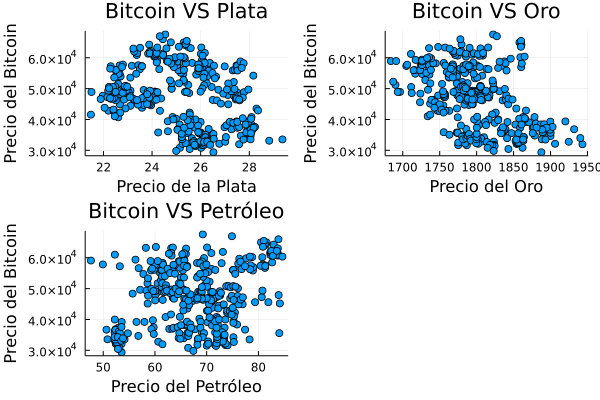

In [3]:
using Plots
Silv_Price=TaggedData[:,2]
Gold_Price=TaggedData[:,3]
Oil_Price=TaggedData[:,4]
Bit_Price=TaggedData[:,5]
PSilv=plot(Silv_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Plata", xlabel="Precio de la Plata", ylabel="Precio del Bitcoin")
PGold=plot(Gold_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Oro", xlabel="Precio del Oro", ylabel="Precio del Bitcoin")
POil=plot(Oil_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Petróleo", xlabel="Precio del Petróleo", ylabel="Precio del Bitcoin")

plot(PSilv, PGold, POil)


Separamos los datos en una matriz $A$ que contenga unicamente una fila de 1´s y los datos del oil, gold y silver, y un vector que contenga los datos del Bitcoin por separado.

In [5]:
Comodities=Array(TaggedData[:,2:4]) 
N = size(Silv_Price,1);
A=[ones(N,1) Comodities]
Y=copy(Bit_Price) 

display(A)
display(Y)


365×4 Matrix{Float64}:
 1.0  26.525   1887.6   53.55
 1.0  26.7665  1906.13  53.55
 1.0  27.008   1924.67  60.64
 1.0  27.584   1943.2   61.45
 1.0  27.867   1940.35  64.585
 1.0  27.27    1931.95  67.72
 1.0  27.473   1920.1   75.23
 1.0  24.845   1862.9   71.91
 1.0  24.989   1857.68  68.59
 1.0  25.133   1852.47  75.88
 1.0  25.478   1847.25  84.05
 1.0  25.637   1841.25  65.57
 1.0  25.768   1858.85  52.91
 ⋮                      
 1.0  22.275   1796.3   68.23
 1.0  22.502   1793.75  71.12
 1.0  22.792   1792.8   72.76
 1.0  22.94    1805.2   73.79
 1.0  22.91    1805.2   74.235
 1.0  22.894   1805.2   74.68
 1.0  22.878   1805.2   75.125
 1.0  22.979   1805.2   75.57
 1.0  23.111   1805.2   75.98
 1.0  22.848   1794.25  76.56
 1.0  23.091   1805.85  76.99
 1.0  23.381   1805.85  75.21

365-element Vector{Float64}:
 29374.152344
 32127.267578
 32782.023438
 31971.914063
 33992.429688
 36824.363281
 39371.042969
 40797.609375
 40254.546875
 38356.441406
 35566.65625
 33922.960938
 37316.359375
     ⋮
 46880.277344
 48936.613281
 48628.511719
 50784.539063
 50822.195313
 50429.859375
 50809.515625
 50640.417969
 47588.855469
 46444.710938
 47178.125
 46306.445313

Y procedemos usando el metodo de minimos cuadrados lineales en donde resolvemos las ecuaciones normales $A^T A x = A^T b$, cuya solucion viene dada por $x = (A^T A)^{-1} A^T  b $. Asi que procedemos a hallar los valores de estas operaciones.

In [6]:
using LinearAlgebra
PA=inv(transpose(A)*A)*(transpose(A))
w=PA*Y

display(PA)
display(w)

4×365 Matrix{Float64}:
 -0.127319     -0.165512     -0.229862     …  -0.0431676    -0.0368649
 -0.00128072   -0.00134933   -0.000854255     -0.00201273   -0.00179943
  0.000115145   0.000137219   0.000153158      4.40169e-5    3.98607e-5
 -0.00065903   -0.000655872  -0.000314408      0.000257176   0.000195298

4-element Vector{Float64}:
 184484.39002614547
   -374.2838754142471
    -80.5519441184997
    254.41723880909163

In [7]:
w_1=pinv(A)*Y

4-element Vector{Float64}:
 184484.39002621977
   -374.28387541476286
    -80.55194411853559
    254.41723880900466

Y Trazamos el resultado en la siguiente grafica:

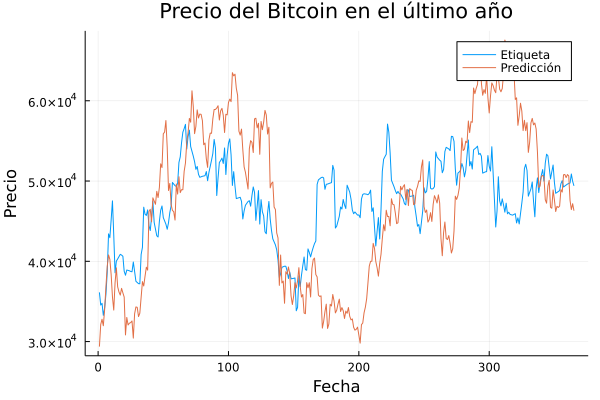

In [8]:
Pred_Bit_Price= Yhat=A*w
Days=Array[1.0:365.0]
plot(Days, Pred_Bit_Price, label="Etiqueta")
plot!(Days, Bit_Price, label="Predicción")
xlabel!("Fecha")
ylabel!("Precio")
title!("Precio del Bitcoin en el último año")